# sktime - A Unified Framework for Machine Learning with Time Series

Tutorial at PyData Berlin 2022

sktime: https://github.com/alan-turing-institute/sktime

these tutorial notebooks: https://github.com/sktime/sktime-tutorial-pydata-berlin-2022

---

### What is sktime?

* scikit-learn like toolbox for learning with time series -> explained below
* open source, permissive license, python package
* openly governed, approx equal academia/industry/early career split
    * 18 core developers
    * community council
* numfocus-affiliated, affiliated academic centers in UK (and expanding)

**EVERYONE CAN [JOIN](https://www.sktime.org/en/stable/get_involved/contributing.html)! EVERYONE CAN BECOME A COMMUNITY LEADER!**

* join our slack (developers) and discord (events)!
    * regular **community collaboration sessions** and stand-ups on Fridays
    * next **community onboarding event**: May 25 - 27
    * next **developer sprint**: June 27 - July 1

Opportunities:
* UKRI grant at UEA, **maintainer job** soon to be advertised
* sktime **mentoring programme**: github.com/sktime/mentoring
* sktime is **Google Summer of Code 2022** org! Application deadline Apr 19


---
## Prelude: scikit-learn, the first scikit-learn-like toolbox

### what makes a scikit-learn-like toolbox?

* unified APIs and workflows ("strategy pattern")
* composability, modular model building
* openness - extensible, contributable

Also see scikit-learn's [getting started guide](https://scikit-learn.org/stable/getting_started.html)!

### Unified API

1. Data specification
2. Model specification
3. Fitting
4. Prediction
5. Evaluation

In [2]:
# 1. data specification
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(331, 10) (111, 10) (331,) (111,)


In [3]:
# 2. model specification
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

regressor = RandomForestRegressor(n_estimators=99)

In [4]:
# 3. model fitting
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=99)

In [5]:
# 4. prediction
y_pred = regressor.predict(X_test)

In [6]:
# 5. evaluation and/or diagnostics
mean_squared_error(y_test, y_pred)

3116.499859823092

`regressor` could have been any regression model, e.g., `LinearRegression`\
nothing else changes! -> unified interface

### Modular model building
* Pipelining & transformers
* Tuning
* Ensembling

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [8]:
pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [9]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mean_squared_error(y_test, y_pred)

3536.5845045045044

### Summary

* cross-sectional input data, without any assumed temporal dependency or ordering
* three learning tasks: cross-sectional classification, regression and clustering 
* a common estimator API for each learning task 
* estimator APIs mirror learning tasks

---
## Introduction to Machine Learning with Time Series


Check out our previous tutorial from PyData Berlin 2021: https://github.com/sktime/sktime-tutorial-pydata-berlin-2021

### Multiple data formats

In [10]:
from sktime.datasets import load_lynx
from sktime.utils.plotting import plot_series

#### Univariate data
> Repeated observations over time from a single variable or kind of measurement

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of Lynx trappings'>)

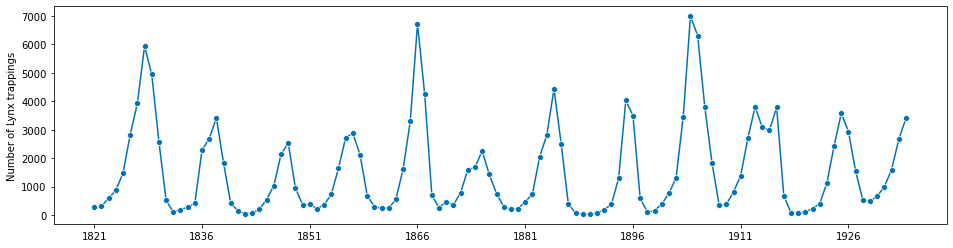

In [11]:
y = load_lynx()
plot_series(y)

#### Multivariate data
> Repeated observations over time from multiple related variables or kinds of measurement

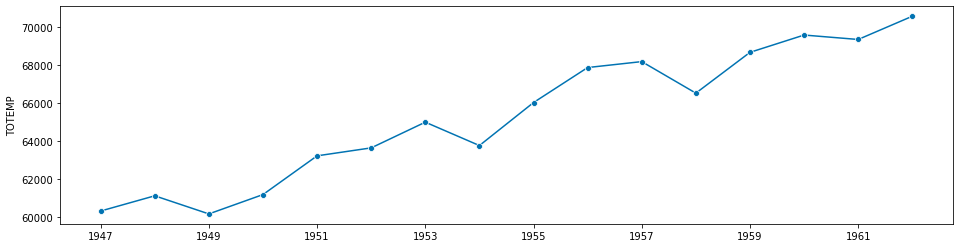

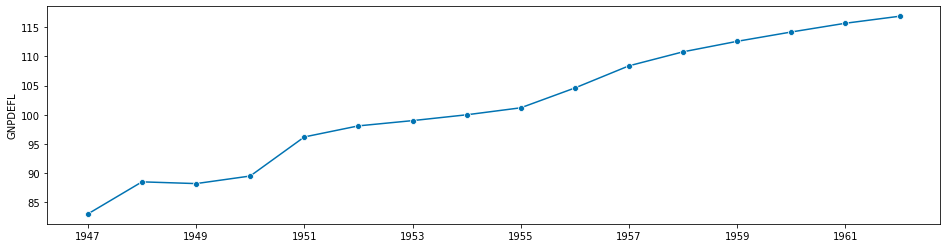

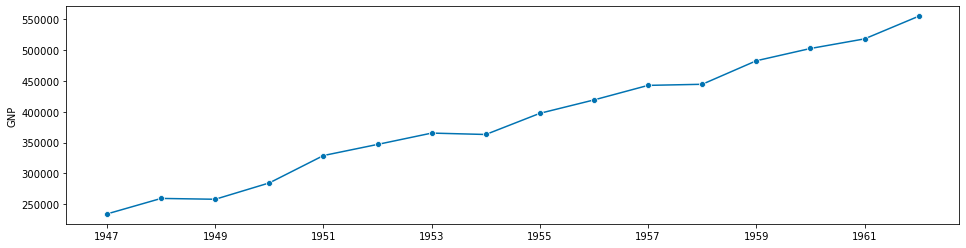

In [12]:
from sktime.datasets import load_longley

y, X = load_longley()

plot_series(y)
for column in X.columns[:2]:
    x = X[column]
    plot_series(x)

#### Panel data
> Repeated observations over time on multiple independent experimental units from one or more related variables or kinds of measurement

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sktime.datasets import load_arrow_head
from sktime.datatypes import convert

In [14]:
X, y = load_arrow_head(return_X_y=True)
X = convert(X, from_type="nested_univ", to_type="numpy3D")

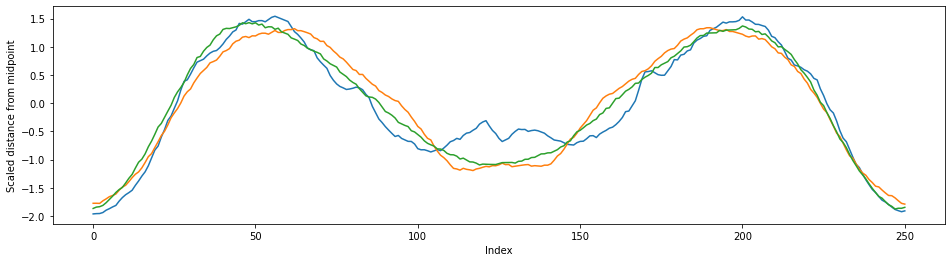

In [15]:
labels, counts = np.unique(y, return_counts=True)
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for label in labels:
    ax.plot(X[y == label, 0, :][0], label=f"class {label}")
ax.set(ylabel="Scaled distance from midpoint", xlabel="Index");

### Multiple learning tasks

For example:
* Forecasting, variations:
    * (vanilla) forecasting
    * **panel forecasting**
    * **global/hierarchical forecasting**
    * univariate vs multivariate
    * with or without exogeneous variables
    * **point forecasts vs probabilistic forecasts**
* Time Series Classification
* Time Series Annotation (e.g. outlier detection)
* Time Series Clustering

### Reduction: From one learning task to another

**Overview**

<img src="img/reduction-relations.png"/>

**Example: From forecasting to regression** 

<img src="img/forecasting-to-regression-reduction.png"/>

### Creating a unified framework

* time-series input data
* multiple learning tasks: forecasting, time series classification and more 
* a common estimator API for each learning task
* estimator APIs mirror learning tasks

![](https://i.imgur.com/JGcclfB.png)

**What's a framework?**

Check out our [glossary of common terms](https://www.sktime.org/en/stable/glossary.html):

> A collection of related and reusable software design templates that practitioners can copy and fill in. Frameworks emphasize design reuse. They capture common software design decisions within a given application domain and distill them into reusable design templates. This reduces the design decision they must take, allowing them to focus on application specifics. Not only can practitioners write software faster as a result, but applications will have a similar structure. Frameworks often offer additional functionality like toolboxes. Compare with toolbox and application.

Check out our [extension templates](https://github.com/alan-turing-institute/sktime/tree/main/extension_templates) and [developer guides](https://www.sktime.org/en/stable/developer_guide.html#developer-guide()!

![](https://i.imgur.com/HKSstog.png)



---

### Credits:

notebook creation: mloning (based on 2021 pydata global), fkiraly (modification)

sktime: https://github.com/alan-turing-institute/sktime/blob/main/CONTRIBUTORS.md